In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  
%matplotlib inline

import os  
path = os.getcwd() + '/ex2data2.txt'  
data = pd.read_csv(path, header=None, names=['Test 1', 'Test 2', 'Accepted'])  

In [2]:
data.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [3]:
data.describe()

,Test 1,Test 2,Accepted
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


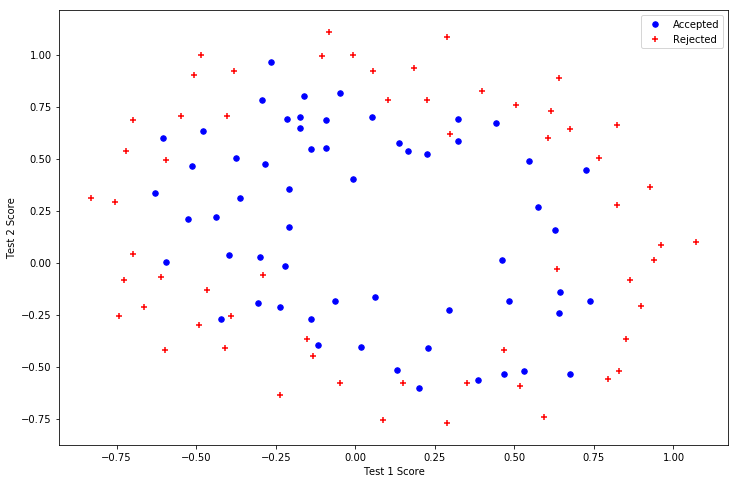

In [4]:
positive = data[data['Accepted'].isin([1])]  
negative = data[data['Accepted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))  
ax.scatter(positive['Test 1'], positive['Test 2'], s=30, c='b', marker='o', label='Accepted')  
ax.scatter(negative['Test 1'], negative['Test 2'], s=30, c='r', marker='+', label='Rejected')  
ax.legend()  
ax.set_xlabel('Test 1 Score')  
ax.set_ylabel('Test 2 Score')  

In [5]:
columns = data.shape[1]
data.insert(0, 'Ones', 1)
X = data.iloc[:, 0: columns - 1]
y = data.iloc[:, columns - 1: columns]

X = np.array(X.values)
y = np.array(y.values)

In [6]:
x1 = data.iloc[:, 1]
x2 = data.iloc[:, 2]

x1 = np.array(x1.values)
x2 = np.array(x2.values)

def map_poly_features(x1, x2):
    deg = 4
    out = np.ones((x1.shape[0], 1))
    
    for i in range(1, deg + 1):
        for j in range(0, i + 1):
            t1 = np.power(x1, i - j)
            t2 = np.power(x2, j)
            t = np.multiply(t1, t2).reshape(t1.shape[0], 1)
            out = np.hstack((out, t))
            
    return out

mapped_X = map_poly_features(x1, x2)

In [7]:
sigmoid = lambda z: 1 / (1 + np.exp(-z))
    
theta = np.zeros(mapped_X.shape[1])

def cost(theta, X, y, lam):  
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    first = np.multiply(-y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - y), np.log(1 - sigmoid(X * theta.T)))
    reg = (lam / 2 * len(X)) * np.sum(np.power(theta[:,1:theta.shape[1]], 2))
    
    return np.sum(first - second) / (len(X)) + reg

def gradient(theta, X, y, lam):  
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)

    parameters = int(theta.ravel().shape[1])
    grad = np.zeros(parameters)

    error = sigmoid(X * theta.T) - y

    for i in range(parameters):
        term = np.multiply(error, X[:,i])

        if (i == 0):
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X)) + ((lam / len(X)) * theta[:, i])

    return grad

cost(theta, mapped_X, y, 0)

0.69314718055994551

In [8]:
from scipy import optimize as opt

def optimize_theta(theta, X, y, lam):
    res = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient, args=(X, y, lam))  
    h = np.matrix(res[0])
    return h

In [9]:
def plot_params(theta, X, y, lam):
    x_v = np.linspace(-1, 1.5, 50)
    y_v = np.linspace(-1, 1.5, 50)
    z_v = np.zeros(shape=(len(x_v), len(y_v)))
    
    p = optimize_theta(theta, X, y, lam)
    
    for i in range(len(x_v)):
        for j in range(len(y_v)):
            myfeaturesij = map_poly_features(np.array([x_v[i]]),np.array([y_v[j]]))
            z_v[i][j] = np.dot(p, myfeaturesij.T)

    z_v = z_v.transpose()
    xx, yy = np.meshgrid(x_v, y_v)
    return (xx, yy, z_v)

In [10]:
def mesh(lam):
    fig, ax = plt.subplots(figsize=(12,8))  
    ax.scatter(positive['Test 1'], positive['Test 2'], s=30, c='b', marker='o', label='Accepted')  
    ax.scatter(negative['Test 1'], negative['Test 2'], s=30, c='r', marker='+', label='Rejected')  
    ax.legend()  
    ax.set_xlabel('Test 1 Score')  
    ax.set_ylabel('Test 2 Score')
    xx, yy, zz = plot_params(theta, mapped_X, y, lam)
    ax.contour(xx, yy, zz, [0])

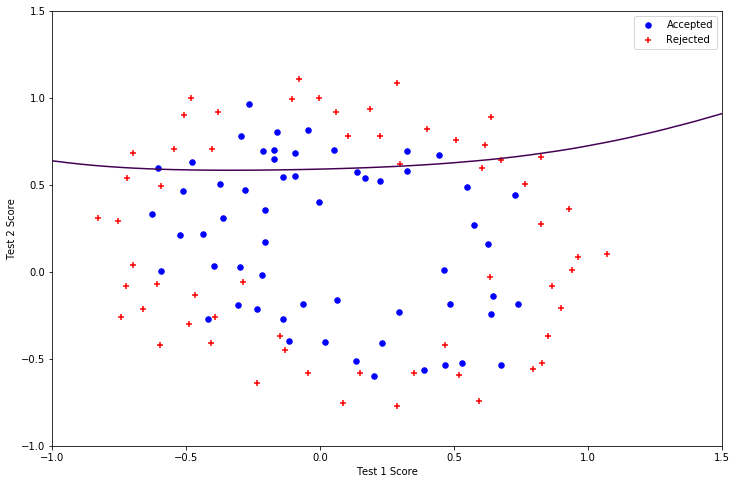

In [11]:
mesh(1)